In [121]:
import numpy as np
import librosa
import librosa.display
import os
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
root_dir = "/media/hackstock/Datasets/speech_commands"
on_dir = f"{root_dir}/on"
off_dir = f"{root_dir}/off"

In [123]:
on_files = os.listdir(on_dir)
off_files = os.listdir(off_dir)

In [124]:
on_sound, on_sr = librosa.load(f"{on_dir}/{on_files[0]}")
off_sound, off_sr = librosa.load(f"{off_dir}/{off_files[0]}")

In [125]:
print(on_sr, off_sr)
print(on_sound.shape, off_sound.shape)

22050 22050
(22050,) (20481,)


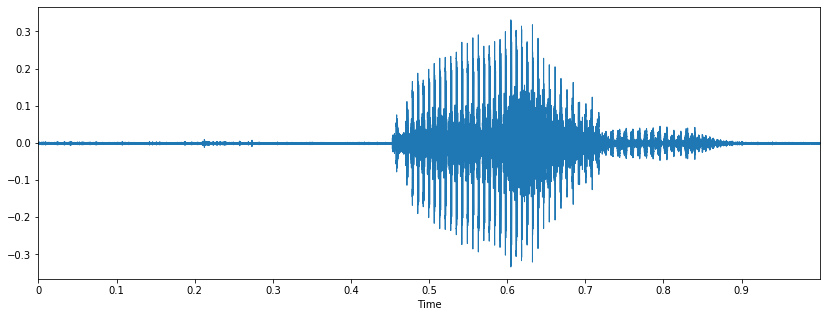

In [126]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(on_sound, sr=on_sr)

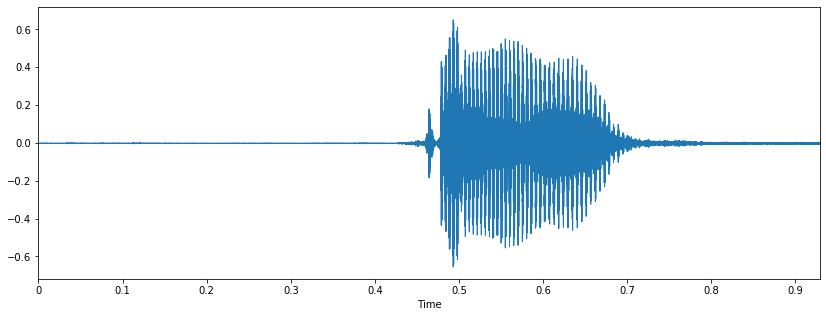

In [127]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(off_sound, sr=off_sr)

In [128]:
ipd.Audio(on_sound, rate=on_sr)

In [129]:
ipd.Audio(off_sound, rate=off_sr)

In [130]:
target_sample_rate = 22050
samples_per_class = 50

In [131]:
on_sounds = []
count = 0
for f in on_files:
    data, sr = librosa.load(f"{on_dir}/{f}")
    if data.shape[0] == target_sample_rate and sr == target_sample_rate:
        on_sounds.append(data)
        count += 1
        if count == samples_per_class:
            break

In [132]:
on_sounds = np.array(on_sounds)
on_targets = np.ones(samples_per_class)

In [133]:
print(on_sounds.shape)

(50, 22050)


In [134]:
off_sounds = []
count = 0
for f in off_files:
    data, sr = librosa.load(f"{off_dir}/{f}")
    if data.shape[0] == target_sample_rate and sr == target_sample_rate:
        off_sounds.append(data)
        count += 1
        if count == samples_per_class:
            break

In [135]:
off_sounds = np.array(off_sounds)
off_targets = np.ones(samples_per_class) * -1

In [136]:
print(off_sounds.shape)

(50, 22050)


In [137]:
sound_features = np.concatenate((on_sounds, off_sounds), axis=0)
print(sound_features.shape)

(100, 22050)


In [138]:
sound_targets = np.concatenate((on_targets, off_targets), axis=0)
print(sound_targets.shape)

(100,)


In [139]:
np.unique(sound_targets)

array([-1.,  1.])

In [140]:
np.save("./datasets/on_off/features.npy", sound_features)
np.save("./datasets/on_off/targets.npy", sound_targets)